# 資料匯入

In [1]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5") #也可load sklearn內建iris datasets
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 切分資料 (為作圖方便，先只選取兩個features)

In [2]:
from sklearn.model_selection import train_test_split

X = df[['花萼長度','花萼寬度']]
y = df['屬種']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

### 標準化

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 一、KNN
可調整k, weight (uniform, distance)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### 準確度 & 混淆矩陣

In [5]:
print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.55      0.85      0.67        13
 Iris-virginica       0.75      0.40      0.52        15

    avg / total       0.79      0.76      0.74        45

[[17  0  0]
 [ 0 11  2]
 [ 0  9  6]]


### 視覺化混淆矩陣函式（from scikit-learn官網）

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Confusion matrix, without normalization
[[17  0  0]
 [ 0 11  2]
 [ 0  9  6]]


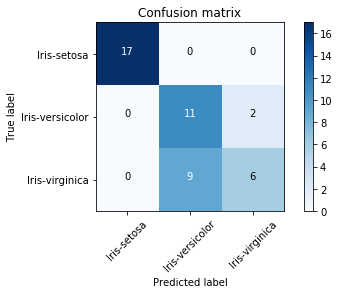

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test_std))
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

plot_confusion_matrix(cnf_matrix, classes=target_names) #注意：targeet_names必須和confusion_matrix中labels的順序一致
plt.show()

## 決策邊界

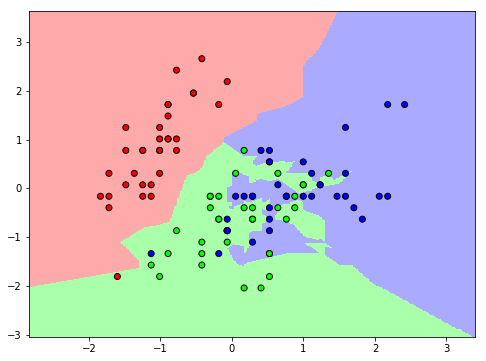

In [8]:
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import matplotlib.patches as mpatches

# 把類別轉成0,1,2，散佈圖上色用
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
y_color = le.transform(y_train)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # 著色時每格大小
# 設定x,y邊界、著色格子
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# 預測、類別轉成0,1,2
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = le.transform(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))

# 上色
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# 資料散佈
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_color, cmap=cmap_bold, edgecolor='k')
# x,y邊界設定
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [9]:
X_train_std[:, 1].min()

-2.0393653745170708

# 二、決策分類樹
可調整Gini或Entropy，決策樹可不用做資料標準化

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['花萼長度','花萼寬度'],
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],)

### 執行dot前須先安裝graphviz
在Anaconda中安裝graphviz，或是到官網下載：http://www.graphviz.org/Download..php

In [12]:
!dot -Tpng tree.dot -o tree.png

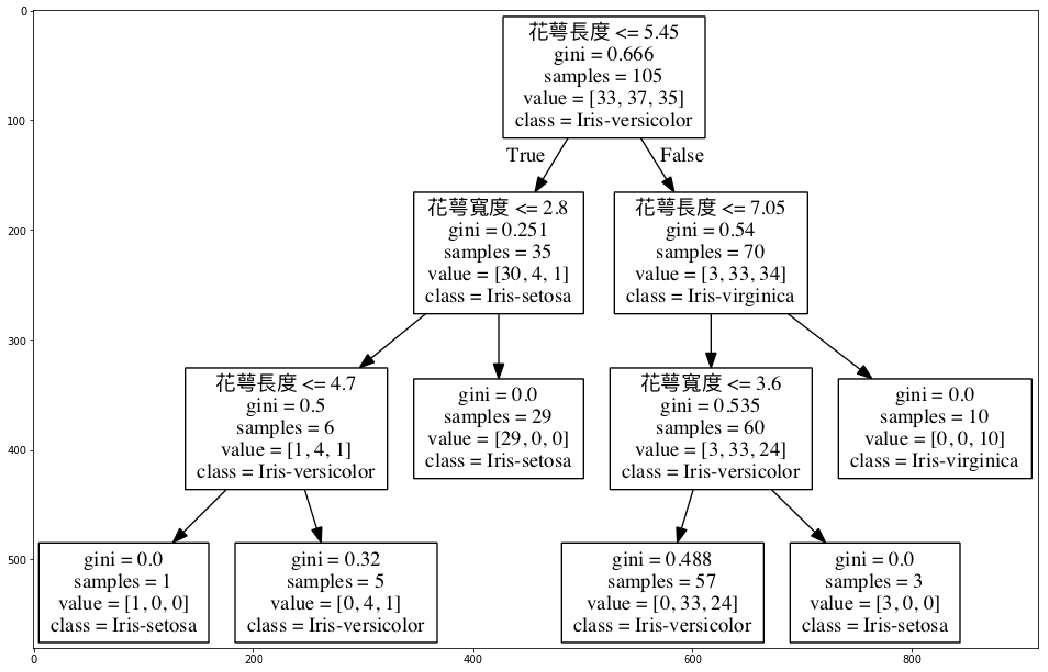

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img = mpimg.imread('tree.png')
fig = plt.figure(figsize=(18,20))
plt.imshow(img)

In [14]:
print(metrics.classification_report(y_test, tree.predict(X_test)))
print(metrics.confusion_matrix(y_test, tree.predict(X_test),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       0.94      0.94      0.94        17
Iris-versicolor       0.46      0.92      0.62        13
 Iris-virginica       1.00      0.13      0.24        15

    avg / total       0.82      0.67      0.61        45

[[16  1  0]
 [ 1 12  0]
 [ 0 13  2]]


## 特徵重要性

In [15]:
tree.feature_importances_.tolist()
df = pd.DataFrame({'feature':['花萼長度','花萼寬度'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,花萼長度,0.750569
1,花萼寬度,0.249431


In [16]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height),
                ha='center', va='bottom')

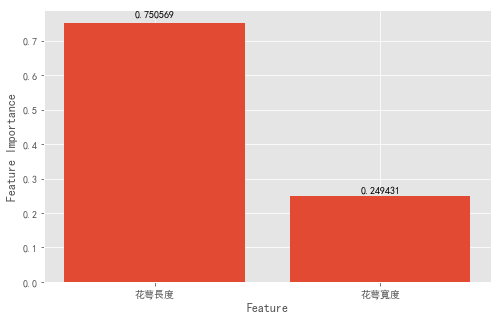

In [17]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(8,5))
plt.rcParams['font.family']='SimHei'

gini = plt.bar(df.index,df['feature_importance'],align='center')
plt.xlabel('Feature') #X軸名稱
plt.ylabel('Feature Importance') #Y軸名稱
plt.xticks(df.index, df['feature']) #X軸項目名稱

autolabel(gini)

plt.show()

# 三、SVM
可調整kernel、C值

In [18]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf")
svc.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
print(metrics.classification_report(y_test, svc.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, svc.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.61      0.85      0.71        13
 Iris-virginica       0.80      0.53      0.64        15

    avg / total       0.82      0.80      0.80        45

[[17  0  0]
 [ 0 11  2]
 [ 0  7  8]]


# 四、貝式分類器
通常適合處理包含文字的分類，如：垃圾信件、正負評

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)

GaussianNB(priors=None)

In [21]:
print(metrics.classification_report(y_test, gnb.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, gnb.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.61      0.85      0.71        13
 Iris-virginica       0.80      0.53      0.64        15

    avg / total       0.82      0.80      0.80        45

[[17  0  0]
 [ 0 11  2]
 [ 0  7  8]]


### it's your turn...